# Machine Learning Model

### Business Problem

Startup XYZ is in the business of giving personal loans, structured as [non-recourse loans](http://www.investopedia.com/terms/n/nonrecoursedebt.asp). The defaults on their loans are much higher than their competitors. Also, the underlying collaterals lose their value way too quicky and has resulted in huge losses for Bank XYZ.

Alice was recently appointed as the Senior VP of the Risk Organization. She comes from a strong analytics background and wants to leverage data science to identify customer's risk before approving loan.

She's appointed you as a consultant to help her and the team solve this problem.

*Note: This case study was inspired by the [bank marketing case study](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data is a modified version of what is available in that site*

**Brainstorming**

## 1. Frame

The first step is to convert the business problem into an analytics problem

Alice wants to know customer's risk. Let's try to predict the propensity of a customer to default, given the details he/she has entered on the loan application form

## 2. Acquire

After discussions with the IT team of Startup XYZ, you have obtained some historical data from the bank. It has the following columns

**Application Attributes**:
- `years`: Number of years the applicant has been employed  
- `ownership`: Whether the applicant owns a house or not  
- `income`:  Annual income of the applicant  
- `age`: Age of the applicant  
- `amount` : Amount of Loan requested by the applicant  

**Behavioural Attributes**:
- `grade`:  Credit grade of the applicant

**Outcome Variable**:

- `default` : Whether the applicant has defaulted or not 

#### Load the data

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Load the training dataset
df = pd.read_csv("../data/historical_loan.csv")

In [4]:
#View the first few rows of training dataset
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.00,RENT,19200.00,24
1,1,6500,A,2.00,MORTGAGE,66000.00,28
2,0,2400,A,2.00,RENT,60000.00,36
3,0,10000,C,3.00,RENT,62000.00,24
4,1,4000,C,2.00,RENT,20000.00,28


In [5]:
#View the columns of the train dataset
df.columns

Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')

In [6]:
#View the data types of the train dataset
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [7]:
#View the number of records in the data
df.shape

(7727, 7)

In [8]:
#View summary of raw data 
df.describe()

,default,amount,years,income,age
count,7727.00,7727.00,7448.00,7727.00,7727.00
mean,0.48,9453.35,6.09,63371.97,27.54
std,0.50,6298.60,6.70,46871.95,6.13
min,0.00,500.00,0.00,4000.00,20.00
25%,0.00,5000.00,2.00,37000.00,23.00
50%,0.00,8000.00,4.00,54000.00,26.00
75%,1.00,12000.00,8.00,76796.50,30.00
max,1.00,35000.00,62.00,1200000.00,94.00


## 3. Refine

Lets check the dataset for compeleteness - by checking for missing values


**Missing values**

In [9]:
# Find if df has missing values.
df.isnull().head()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [10]:
# In a large dataset, this is hard to find if there are any missing values or not.
# We can chain operators on the output. Let's use sum()

df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

So, we see that `years` have missing values. The column is numeric. We have three options for dealing with missing values

**Options to treat Missing Values**

1. **REMOVE** - NAN rows
2. **IMPUTATION** - Replace them with something??
     - Mean
     - Median
     - Fixed Number - Domain Relevant
     - High Number (999) - Issue with modelling
3. **BINNING** - Categorical variable and "Missing becomes a number
4. **DOMAIN SPECIFIC** - Entry error, pipeline, etc.

In [11]:
# Let's replace missing values with mean
# There's a fillna function
df.years = df.years.fillna(np.mean(df.years))

In [12]:
#Finding unique values of years 
pd.unique(df.years)

array([  2.       ,   3.       ,   1.       ,   6.       ,   4.       ,
         0.       ,  16.       ,  12.       ,  11.       ,  15.       ,
         6.0863319,  18.       ,   8.       ,   7.       ,  34.       ,
         9.       ,  14.       ,   5.       ,  10.       ,  20.       ,
        26.       ,  19.       ,  24.       ,  61.       ,  27.       ,
        21.       ,  13.       ,  30.       ,  23.       ,  22.       ,
        31.       ,  25.       ,  17.       ,  38.       ,  28.       ,
        29.       ,  56.       ,  47.       ,  45.       ,  43.       ,
        32.       ,  33.       ,  36.       ,  40.       ,  44.       ,
        53.       ,  41.       ,  55.       ,  62.       ,  48.       ,
        37.       ,  35.       ])

We also need to check for quality - by checking for outliers in the data. For this workshop, we will skip doing that. But remember to check for outliers when doing in real-life

## 4. Explore

The goal is to build some intuition around the data

** Single Variable Exploration - Univariate Analysis**

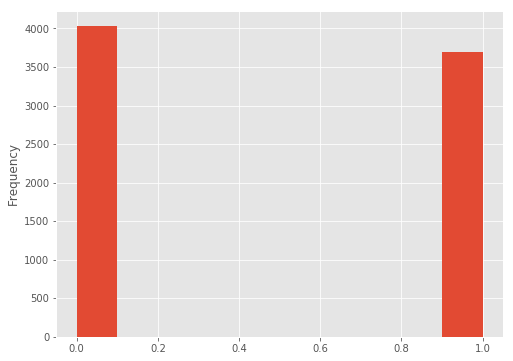

In [13]:
# Create histogram for target variable - default
df.default.plot.hist()

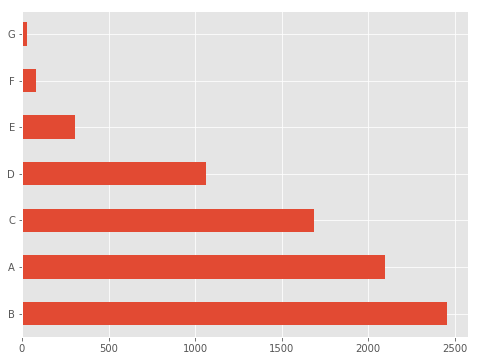

In [14]:
# Explore grade
df.grade.value_counts().plot.barh()

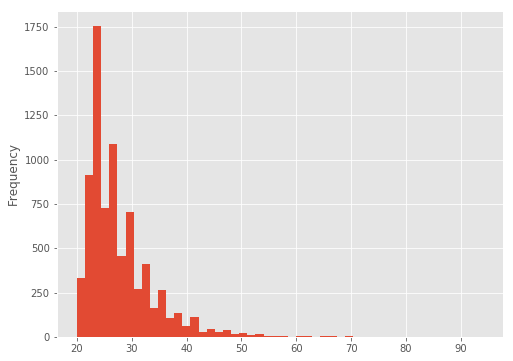

In [15]:
# Explore age
df.age.plot.hist(bins=50)

** Dual Variable Exploration - Bivariate Analysis**

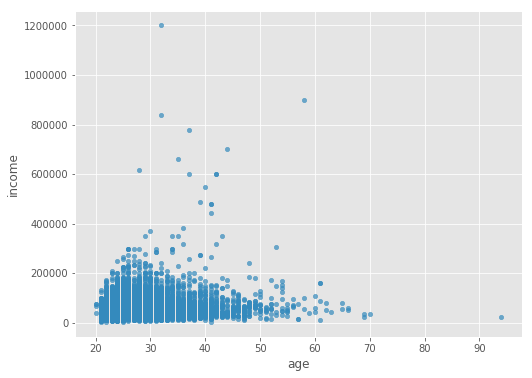

In [16]:
# Explore the impact of age with income
df.plot.scatter(x='age', y='income', alpha=0.7)

###  EXERCISE
** Three Variables Exploration **

Explore the relationship between age, income and defualt

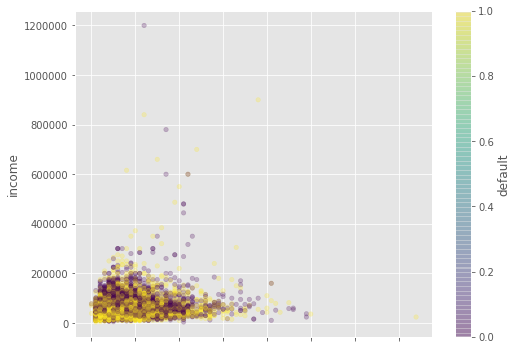

In [17]:
df.plot.scatter(x='age', y='income', c='default', alpha=0.25, cmap='viridis')

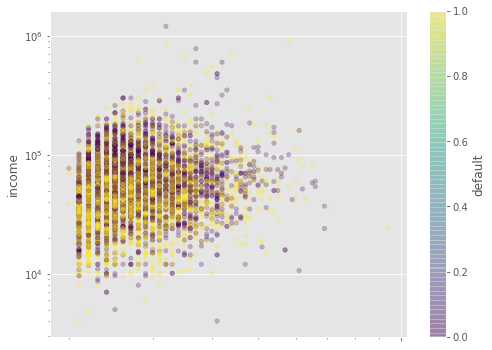

In [18]:
# Explore the relationship between age, income and default
df.plot.scatter(x='age', y='income', c='default', logx=True, logy=True, alpha=0.25, cmap='viridis')

## 5. Transform

In [19]:
# Let's again revisit the data types in the dataset
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

Two of the columns are categorical in nature - grade and ownership.

To build models, we need all of the features to be numeric. There exists a number of ways to convert categorical variables to numeric values.

We will use one of the popular options: `LabelEncoding`

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Let's not modify the original dataset. 
# Let's transform it in another dataset
df_encoded = df.copy()

In [22]:
# instantiate label encoder
le_grade = LabelEncoder()

In [23]:
# fit label encoder
le_grade = le_grade.fit(df_encoded["grade"])

In [24]:
df_encoded.grade = le_grade.transform(df_encoded.grade)

In [25]:
df_encoded.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.00,RENT,19200.00,24
1,1,6500,0,2.00,MORTGAGE,66000.00,28
2,0,2400,0,2.00,RENT,60000.00,36
3,0,10000,2,3.00,RENT,62000.00,24
4,1,4000,2,2.00,RENT,20000.00,28


### EXERCISE

Do label encoding on ownership

In [26]:
df.ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [27]:
le_ownership = LabelEncoder()
le_ownership = le_ownership.fit(df["ownership"])

In [28]:
df_encoded.ownership = le_ownership.transform(df_encoded.ownership)

In [29]:
df_encoded.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.00,3,19200.00,24
1,1,6500,0,2.00,0,66000.00,28
2,0,2400,0,2.00,3,60000.00,36
3,0,10000,2,3.00,3,62000.00,24
4,1,4000,2,2.00,3,20000.00,28


## 6. Model

Common approaches:

1. Linear models
2. Tree-based models
3. Neural Networks
4. ... 

Some choices to consider:

1. Interpretability
2. Run-time
3. Model complexity
4. Scalability

For the purpose of this workshop, we will use tree-based models.

We will do the following two:

1. Decision Tree
2. Random Forest

### Decision Trees

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Let's first build a model using just two features to build some intuition around decision trees

**Step 1 -** Create features matrix and target vector

In [30]:
X_2 = df_encoded.loc[:,('age', 'amount')]
y = df_encoded.loc[:,'default']

** Step 2 -** Build decision tree model

In [31]:
from sklearn import tree

In [32]:
# instantiate the decision tree object
clf_dt_2 = tree.DecisionTreeClassifier(max_depth=2)

In [33]:
# fit the decision tree model
clf_dt_2 = clf_dt_2.fit(X_2, y)

**Step 3 -** Visualize the decision tree

In [34]:
import pydotplus 
from IPython.display import Image

In [35]:
dot_data = tree.export_graphviz(clf_dt_2, out_file='tree.dot', feature_names=X_2.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)

In [36]:
# Incase you don't have graphviz installed
# txt = open("tree_3.dot").read().replace("\\n", "\n  ").replace(";", ";\n")
# print(txt)

In [37]:
graph = pydotplus.graph_from_dot_file('tree.dot')  

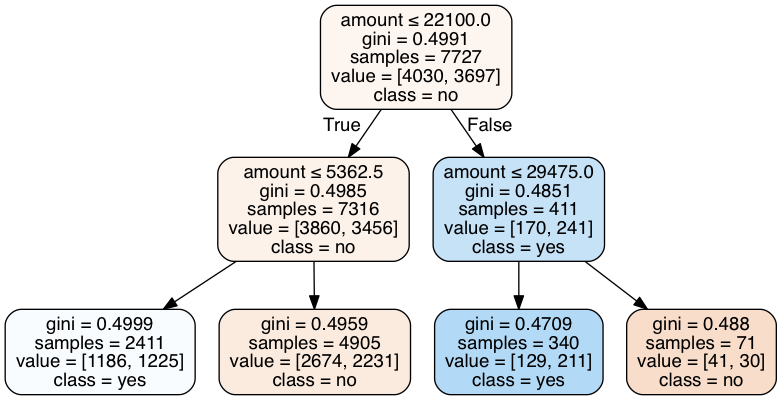

In [38]:
Image(graph.create_png()) 

Let's see the decision boundaries

In [39]:
def plot_boundaries(X2, clf):
    x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
    y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100), 
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    target = clf.predict(X2)
    plt.scatter(x = X2.iloc[:,0], y = X2.iloc[:,1], c = y, s = 20, cmap=plt.cm.magma)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.4)

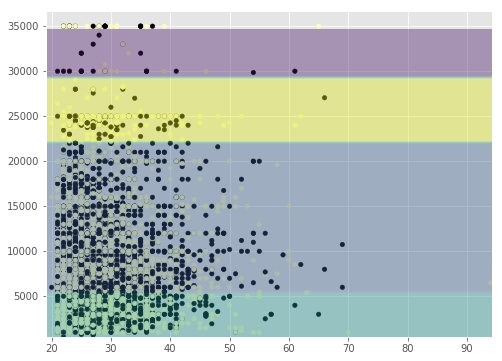

In [40]:
plot_boundaries(X_2, clf_dt_2)

### EXERCISE 

Change the depth of the Decision Tree classifier to 10 and plot the decision boundaries again.

In [41]:
clf_dt_10 = tree.DecisionTreeClassifier(max_depth=10).fit(X_2,y)

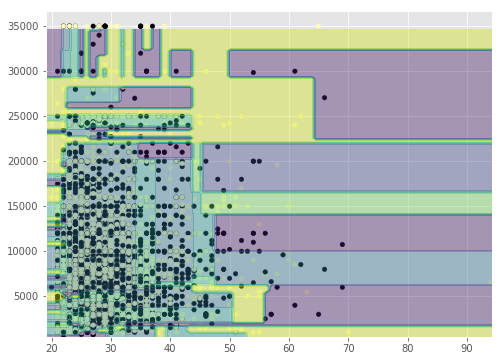

In [42]:
plot_boundaries(X_2, clf_dt_10)

Lets understand first just the difference between **Class** prediction and **Class Probabilities**

In [43]:
pred_class = clf_dt_10.predict(X_2)
pred_proba = clf_dt_10.predict_proba(X_2)

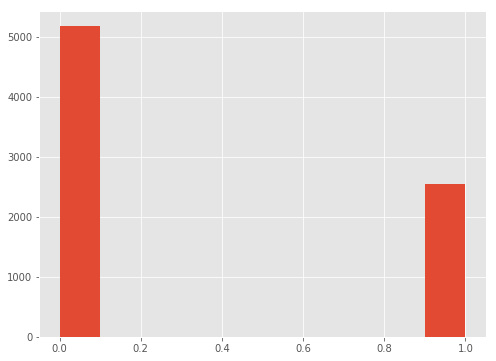

In [44]:
plt.hist(pred_class);

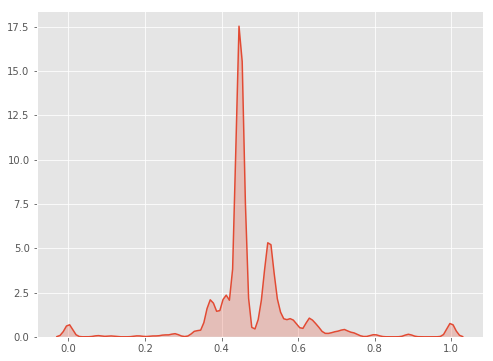

In [45]:
import seaborn as sns
sns.kdeplot(pred_proba[:,1], shade=True)

### Model Validation

While we have created the model, we still don't have a *measure* of how good the model is. We need to measure some accuracy metric of the model and have confidence that it will generalize well. We should be confident that when we put the model in production (real-life), the accuracy we get from the model results should mirror the metrics we obtained when we built the model.

Selecting the right accuracy metric for the model is important. 

[This wiki](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) has a good overview of some of the common metrics.

We will use a metric - **Area Under the Curve**

#### Area Under the Curve

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test 
([source](https://www.medcalc.org/manual/roc-curves.php))


![](img/roc.png)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
X = df_encoded.iloc[:,1:]
y = df_encoded.iloc[:,0]

In [48]:
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

In [49]:
def pred_df(clf, X, y):
    clf = clf.fit(X,y)
    y_pred = clf.predict(X)
    y_proba = clf.predict_proba(X)[:,1]
    pred_df = pd.DataFrame({"actual": np.array(y), "predicted": y_pred, "probability": y_proba})
    return pred_df

In [50]:
pred_dt = pred_df(clf_dt, X,y)
pred_dt.head()

,actual,predicted,probability
0,0,1,0.63
1,1,0,0.25
2,0,0,0.12
3,0,1,0.61
4,1,1,0.68


In [51]:
pd.crosstab(pred_dt.predicted, pred_dt.actual)

actual,0,1
predicted,,
0,2723,1384
1,1307,2313


In [52]:
confusion_matrix(pred_dt.predicted, pred_dt.actual)

array([[2723, 1384],
       [1307, 2313]])

In [53]:
def plot_prediction(pred_df):
    pred_df_0 = pred_df[pred_df.actual == 0]
    pred_df_1 = pred_df[pred_df.actual == 1]
    sns.kdeplot(pred_df_0.probability, shade=True, label="no default")
    sns.kdeplot(pred_df_1.probability, shade=True, label="default")    

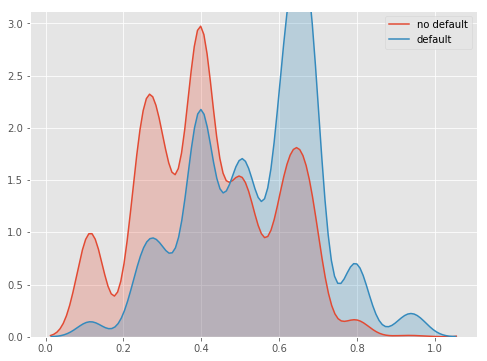

In [54]:
plot_prediction(pred_dt)

In [55]:
def plot_roc_auc(pred_df):
    fpr, tpr, thresholds = roc_curve(pred_df.actual, pred_df.probability)
    auc_score = roc_auc_score(pred_df.actual,pred_df.probability)
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    return print("AUC = %0.2f" % auc_score)

AUC = 0.70


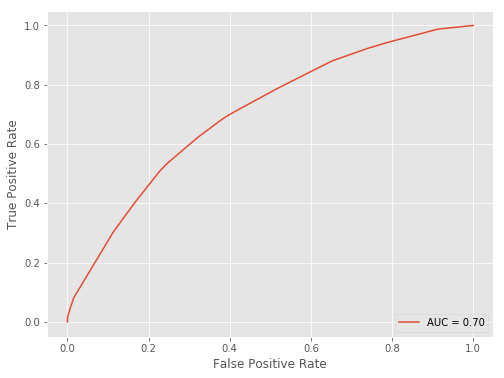

In [56]:
plot_roc_auc(pred_dt)

### EXERCISE

Build a decison tree classifier with max_depth = 10 and plot confusion_matrix & auc

In [57]:
clf_dt_10 = tree.DecisionTreeClassifier(max_depth=10)

In [58]:
pred_dt_10 = pred_df(clf_dt_10, X,y)

In [59]:
confusion_matrix(pred_dt_10.predicted, pred_dt_10.actual)

array([[3105, 1020],
       [ 925, 2677]])

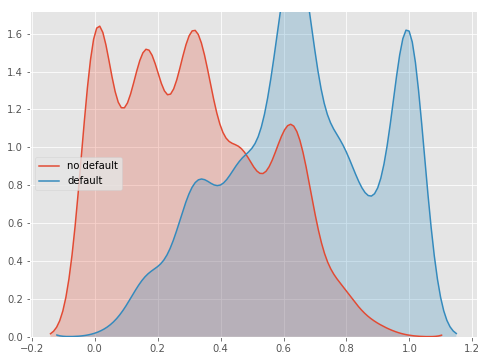

In [60]:
plot_prediction(pred_dt_10)

AUC = 0.84


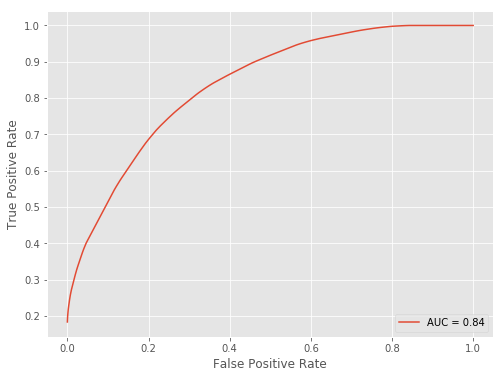

In [61]:
plot_roc_auc(pred_dt_10)

### Cross-validation

Now that we have chosen the error metric, how do we find the generalization error?

We do this using cross-validation. ([source]
(https://en.wikipedia.org/wiki/Cross-validation_(statistics))

From wiki: 
> One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds.

![](img/cv.jpg)



We will use `StratifiedKFold`.

This ensures that in each fold, the proportion of positive class and negative class remain similar to the original dataset


This is the process we will follow to get the mean cv-score

1. Generate k-fold
2. Train the model using k-1 fold
3. Predict for the kth fold 
4. Find the accuracy.
5. Append it to the array
6. Repeat 2-5 for different validation folds
7. Report the mean cross validation score

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
def cross_val(clf, k):
    
    # Instantiate stratified k fold.
    kf = StratifiedKFold(n_splits=k)
    
    # Let's use an array to store the results of cross-validation
    kfold_auc_score = []

    # Run kfold CV
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        proba = clf.predict_proba(X.iloc[test_index])[:,1]
        auc_score = roc_auc_score(y.iloc[test_index],proba)
        print(auc_score)
        kfold_auc_score.append(auc_score)
    
    print("Mean K Fold CV:", np.mean(kfold_auc_score))

In [64]:
cross_val(clf_dt, 3)

0.642693005832
0.650579967315
0.728094992312
Mean K Fold CV: 0.67378932182


### EXERCISE

Build a classifier with max_depth = 10 and run a 5-fold CV to get the auc score.

In [65]:
clf_dt_10 = tree.DecisionTreeClassifier(max_depth=10)

In [66]:
cross_val(clf_dt_10, 5)

0.617339547985
0.629765776943
0.642332371893
0.701615421551
0.691543800387
Mean K Fold CV: 0.656519383752


Build a classifier with max_depth = `20` and run a 5-fold CV to get the auc score.

In [67]:
clf_dt_20 = tree.DecisionTreeClassifier(max_depth=20)

In [68]:
cross_val(clf_dt_20, 5 )

0.605451512306
0.573145664275
0.610873455847
0.651981753896
0.643671281357
Mean K Fold CV: 0.617024733536


### Bagging

Decision trees in general have low bias and high variance. We can think about it like this: given a training set, we can keep asking questions until we are able to distinguish between ALL examples in the data set. We could keep asking questions until there is only a single example in each leaf. Since this allows us to correctly classify all elements in the training set, the tree is unbiased. However, there are many possible trees that could distinguish between all elements, which means higher variance.

### How do we reduce variance?
In order to reduce the variance of a single error tree, we usually place a restriction on the number of questions asked in a tree. This is true  for single decision trees which we have seen in previous notebooks.

Along with this other method to do reduce variance is to **ensemble models** of decision trees. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

### How to ensemble?

1. **Averaging**: Build several estimators independently and then average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples:
    - Bagging
    - Random Forest
    - Extremely Randomized Trees
 
2. **Boosting**: Build base estimators sequentially and then try to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
    - AdaBoost
    - Gradient Boosting (e.g. xgboost)
    
### Random Forest

In random forests, each tree in the ensemble is built from a **sample drawn with replacement** (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a **random subset of the features**. 

As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.



**Random Forest Model**

The advantage of the `scikit-learn` API is that the syntax remains fairly consistent across all the classifiers.

If we change the DecisionTreeClassifier to RandomForestClassifier in the above code, we should be good to go :-)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf_rf = RandomForestClassifier(n_estimators=10)

In [71]:
cross_val(clf_rf, 5)

0.67772198377
0.650938065857
0.691338137178
0.735809238559
0.759253165535
Mean K Fold CV: 0.70301211818


### EXERCISE

Change the number of trees from 10 to 100 and make it 5-fold. And report the cross-validation error (Hint: You should get ~ 0.74. )

In [72]:
clf_rf_100 = RandomForestClassifier(n_estimators=100)

In [73]:
cross_val(clf_rf_100, 5)

0.706778552746
0.691525551606
0.720023537944
0.784014176491
0.80582203165
Mean K Fold CV: 0.741632770088


A more detailed version of bagging and random forest can be found in the speakers' introductory machine learning workshop material

[bagging](https://github.com/amitkaps/applied-machine-learning/blob/master/Module-03d-Model-Bagging.ipynb)  
[random forest](https://github.com/amitkaps/applied-machine-learning/blob/master/Module-03e-Model-RandomForest.ipynb)

### Model Selection

We choose the model and its hyper-parameters that has the best cross-validation score on the chosen error metric.

In our case, it is random forest.

Now - how do we get the model?

We need to run the model with the chosen hyper-parameters on all of the train data. And serialize it.

In [74]:
final_model = RandomForestClassifier(n_estimators=100)
final_model = final_model.fit(X, y)

### Model serialization

We need to serialize the model and the label encoders. 

In [75]:
from sklearn.externals import joblib

In [76]:
joblib.dump(final_model, "model.pkl")
joblib.dump(le_grade, "le_grade.pkl")
joblib.dump(le_ownership, "le_ownership.pkl");